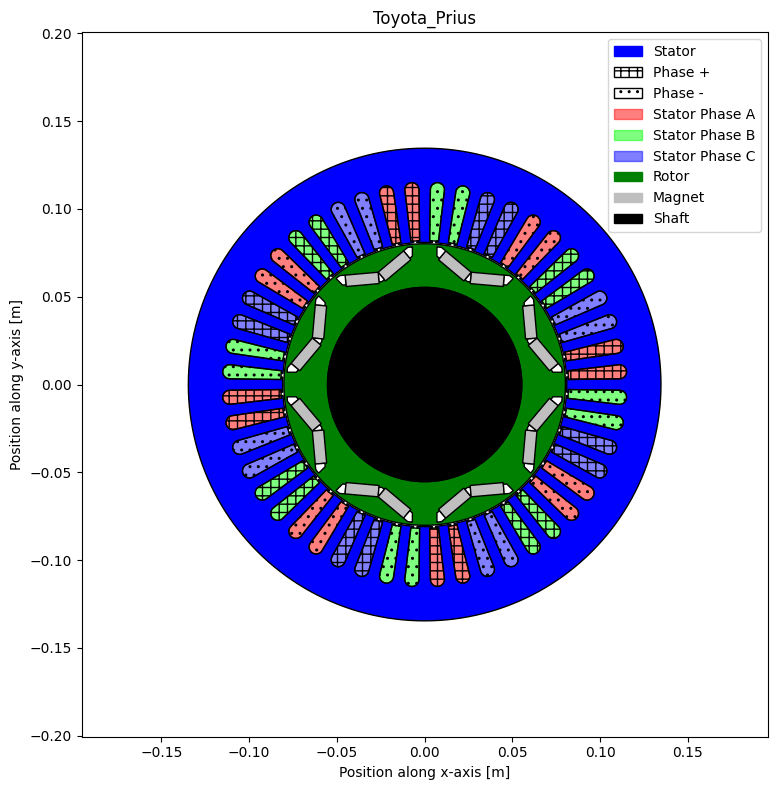

In [79]:
%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR
#from util.simulation import *
import itertools
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq
import numpy as np
machine = load(join(DATA_DIR, "Machine", "Toyota_Prius.json"))

# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = machine.plot(is_show_fig=False)
plt.show()

Modification de nombre de slots ou de bobines
Cette processuse permet d’introduire des défauts liés à l’enroulement

In [80]:
# Affichage des valeurs initiales
print("Zs :", machine.stator.slot.Zs)
print("Nombre de phases :", machine.stator.winding.qs)
print("Nombre de brins/slot :", machine.stator.winding.Ntcoil)

Zs : 48
Nombre de phases : 3
Nombre de brins/slot : 9


**modification_de_nombre_de_slots (géométrie du stator)

In [81]:
#Création d'un nouveau slot avec Zs = 36 (au lieu de 48) en gardent les mêmes dimensions (H0, H2, etc.), teste de verification
from pyleecan.Classes.SlotW22 import SlotW22

new_slot = SlotW22(
    Zs=36,
    H0=machine.stator.slot.H0,
    H2=machine.stator.slot.H2,
    W0=machine.stator.slot.W0,
    W2=machine.stator.slot.W2,
)

In [82]:
machine.stator.slot = new_slot # on applique ce nouveau slot au stator

In [83]:
# Vérification de la sortie 
print("Nouveau nombre de slots :", machine.stator.slot.Zs)

Nouveau nombre de slots : 36


In [84]:
# Sauvegarde de la machine modifiée
machine.save("Toyota_Prius_Zs_36.json")

[14:28:13] Saving MachineIPMSM to file 'Toyota_Prius_Zs_36.json'.
Saving MachineIPMSM to file 'Toyota_Prius_Zs_36.json'.


In [ ]:
---------------------------------------------------

In [85]:
from pyleecan.Functions.load import load
from pyleecan.Classes.Winding import Winding

# Recharge la machine Zs=36 si tu l'as déjà modifiée
machine = load("Toyota_Prius_Zs_36.json")

In [86]:
# Création d'un enroulement équilibré triphasé
winding = Winding(
    qs=3,         # 3 phases
    p=4,          # 4 paires de pôles
    Ntcoil=9,     # 9 tours par bobine
    Nlayer=1,     # 1 couche
    coil_pitch=0, # écart de bobine par défaut
    is_reverse_wind=False
)

In [87]:
machine.stator.winding = winding

In [88]:
# Générer (ou regénérer) la matrice de connexion
wind_mat = winding.get_connection_mat(Zs=36, p=4)

In [89]:
# Afficher quelques infos utiles
print(" Forme de wind_mat :", wind_mat.shape)
print(" Extrait de la matrice :\n", wind_mat[0, 0, :6, :])

 Forme de wind_mat : (1, 1, 36, 3)
 Extrait de la matrice :
 [[-9.  0.  0.]
 [-9.  0.  0.]
 [ 0.  0.  9.]
 [ 0. -9.  0.]
 [ 9.  0.  0.]
 [ 9.  0.  0.]]


In [91]:
# Sauvegarder la machine complète avec bobinage
machine.save("Toyota_Prius_Zs_36_with_winding.json")


[14:30:21] Saving MachineIPMSM to file 'Toyota_Prius_Zs_36_with_winding.json'.
Saving MachineIPMSM to file 'Toyota_Prius_Zs_36_with_winding.json'.


In [ ]:
----------------------------------------------------------------------------------------------------------------------------

---------------------------Simulation-----------------------------------------

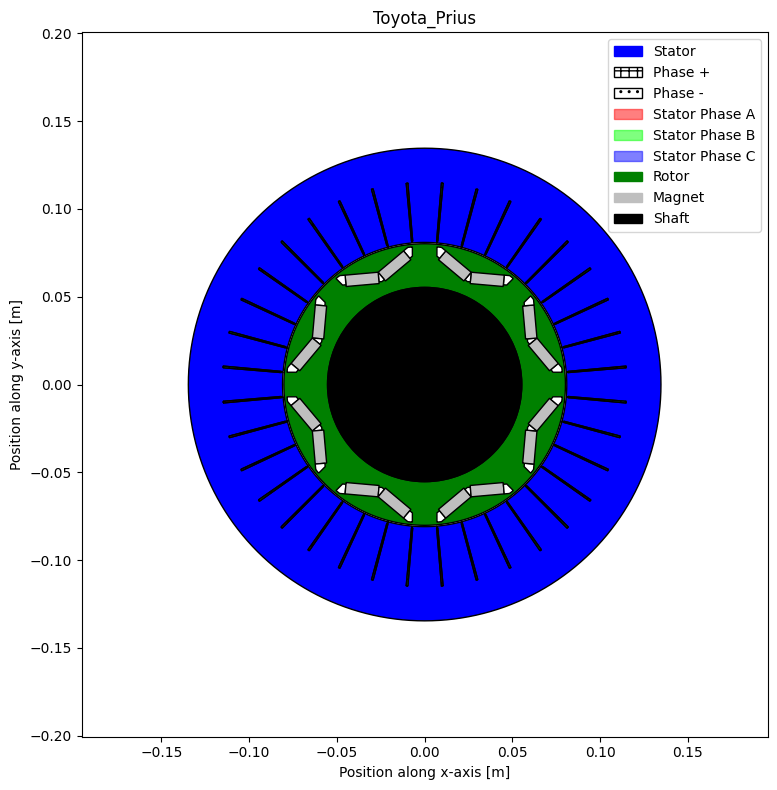

In [92]:
%matplotlib inline

# Load the machine
from os.path import join
from pyleecan.Functions.load import load
from pyleecan.definitions import DATA_DIR

IPMSM_A = load("Toyota_Prius_Zs_36_with_winding.json")
# In Jupyter notebook, we set is_show_fig=False to skip call to fig.show() to avoid a warning message
# All plot methods return the corresponding matplotlib figure and axis to further edit the resulting plot
fig, ax = IPMSM_A.plot(is_show_fig=False)
plt.show()

In [94]:
out_femm.mag.meshsolution.plot_contour(label="B", group_names="stator core", clim=[0,3])



NameError: name 'out_femm' is not defined

--------------------------------------------------------------------------------------------------------------------------------------------------------------